In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# preprocessing imput keras
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28,28,1))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train = X_train/255
X_test = X_test/255

In [4]:
#one hot encoding y
print(y_train[0])
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 10000)

In [6]:
print(len(X_train),' sample training')
print(len(X_val),' sample validation')
print(len(X_test),' sample test')

50000  sample training
10000  sample validation
10000  sample test


In [28]:
# build model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
#model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
H =model.fit(X_train, Y_train, batch_size=64, epochs=8,
          validation_data=(X_val,Y_val), verbose=1)

Epoch 1/8
782/782 [==============================] - 5s 6ms/step - loss: 0.3309 - accuracy: 0.8992 - val_loss: 0.0790 - val_accuracy: 0.9807
Epoch 2/8
782/782 [==============================] - 4s 5ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0818 - val_accuracy: 0.9774
Epoch 3/8
782/782 [==============================] - 4s 5ms/step - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.0489 - val_accuracy: 0.9864
Epoch 4/8
782/782 [==============================] - 4s 5ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0527 - val_accuracy: 0.9847
Epoch 5/8
782/782 [==============================] - 4s 5ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0409 - val_accuracy: 0.9889
Epoch 6/8
782/782 [==============================] - 4s 5ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0504 - val_accuracy: 0.9855
Epoch 7/8
782/782 [==============================] - 4s 5ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 8/8
782

In [31]:
#test
score = model.evaluate(X_test,Y_test,verbose=0)
print('loss test =',score[0])
print('accuracy test =',score[1])

loss test = 0.035870347172021866
accuracy test = 0.989300012588501


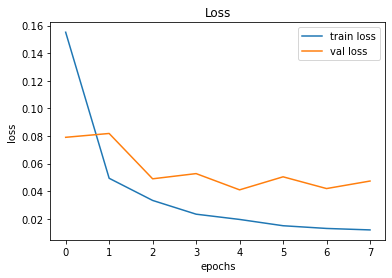

In [32]:
#plot
plt.plot(np.arange(0,8), H.history['loss'], label='train loss')
plt.plot(np.arange(0,8), H.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

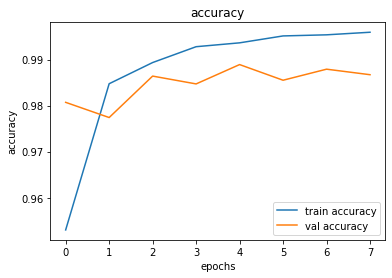

In [33]:
plt.plot(np.arange(0,8), H.history['accuracy'], label='train accuracy')
plt.plot(np.arange(0,8), H.history['val_accuracy'], label='val accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

Gia tri du doan la:  0


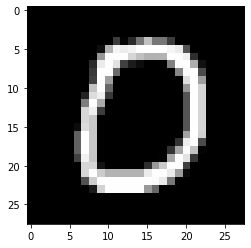

In [37]:
#predict
plt.imshow(X_test[10].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[10].reshape(1,28,28,1))
print('Gia tri du doan la: ',np.argmax(y_predict))